<a href="https://colab.research.google.com/github/mikuns/my_datascience_project_algorithms/blob/master/African_food_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [0]:
# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input

In [0]:
# other imports
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time

In [0]:
# organize imports
from __future__ import print_function

# other imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/2a/cc/c6/e4c872c053261660031b4a3e35ac958725b284c6fde9ff05c8
Successfully built kaggle


In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
!mv kaggle.json /content/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c lagos-ai-hackathon

Food.zip: Downloaded 1GB of 1GB
labels.csv: Downloaded 111KB of 111KB
sample_submission.csv: Downloaded 106B of 106B


In [0]:
!unzip /content/.kaggle/competitions/lagos-ai-hackathon/Food.zip -d /content/.kaggle/competitions/lagos-ai-hackathon/images

Archive:  /content/.kaggle/competitions/lagos-ai-hackathon/Food.zip
   creating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/325686.jpg  
   creating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/
   creating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._325686.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/434450.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._434450.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/434615.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._434615.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/434680.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._473896.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/473990.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._473990.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/474070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._474070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/474139.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._474139.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/474199.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._474199.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/474243.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._490358.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/490495.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._490495.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/490612.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._490612.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/490664.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._490664.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/490806.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._490806.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/490923.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._503441.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/503567.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._503567.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/503706.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._503706.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/503827.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._503827.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/503961.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._503961.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/504099.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._520206.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/520262.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._520262.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/520306.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._520306.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/520348.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._520348.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/520390.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._520390.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/520433.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._545244.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/545289.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._545289.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/545333.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._545333.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/545377.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._545377.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/545420.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._545420.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/545462.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._561678.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/561993.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._561993.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/562256.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._562256.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/562517.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._562517.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/562777.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._562777.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/563233.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._586943.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/586984.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._586984.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/587026.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._587026.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/587070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._587070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/587117.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._587117.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/587237.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._615490.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/615640.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._615640.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/615783.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._615783.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/615924.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._615924.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/616056.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._616056.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/616158.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._645159.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/645229.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._645229.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/645302.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._645302.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/645465.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._645465.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/645644.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._645644.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/645803.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._676909.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/676987.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._676987.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/677047.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._677047.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/677110.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._677110.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/677175.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._677175.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/677246.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

/competitions/lagos-ai-hackathon/images/test/702608.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._702608.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/702684.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._702684.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/702757.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._702757.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/702827.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._702827.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/702902.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._702902.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/702971.jpg  
  inflating: /con

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._729029.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/729177.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._729177.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/729336.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._729336.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/729611.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._729611.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/729816.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._729816.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/730040.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._749564.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/749648.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._749648.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/749896.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._749896.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/750070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._750070.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/750241.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._750241.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/750408.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._775965.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/776043.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._776043.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/776115.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._776115.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/776190.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._776190.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/776261.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._776261.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/776445.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._807674.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/807742.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._807742.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/807816.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._807816.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/807890.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._807890.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/807962.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._807962.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/808033.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._833126.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/833168.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._833168.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/833209.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._833209.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/833251.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._833251.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/833327.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/test/._833327.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/test/833403.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_150_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_151.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_151.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_151_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_151_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_152.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_152.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_152_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_152_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_153.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_233.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_233_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_233_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_234.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_234.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_234_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_234_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_235.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_235.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_235_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

/content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_322_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_322_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_323.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_323.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_323_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_323_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_324.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_324.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_324_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_324_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_467.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_468.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_468.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_469.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_469.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_46_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_46_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_47.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_47.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_470.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_675.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_676.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_676.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_677.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_677.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_678.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_678.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_679.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_679.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_67_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_889.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_88_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_88_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_89.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_89.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_890.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_890.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_891.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._0_891.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/0_892.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_110_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_111.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_111.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_111_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_111_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_112.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_112.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_112_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_112_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_113.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-ha


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_169_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_16_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_16_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_17.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_17.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_170.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_170.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_170_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_170_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_171.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackat

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_216_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_217.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_217.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_217_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_217_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_218.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_218.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_218_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_218_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_219.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hac

ing: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_312.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_312.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_313.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_313.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_314.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_314.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_315.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_315.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_316.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_316.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/trai


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_43.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_430.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_430.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_431.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_431.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_432.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_432.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_433.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_433.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_434.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_567.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_568.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_568.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_569.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_569.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_56_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_56_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_57.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_57.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_570.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_662.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_663.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_663.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_664.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_664.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_665.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_665.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_666.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_666.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_667.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_96_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_97.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_97.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_97_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_97_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_98.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_98.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_98_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._10_98_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/10_99.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_199.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_19_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_19_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_1_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_1_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_2.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_2.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_20.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_20.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_200.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/t


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_358.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_359.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_359.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_35_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_35_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_36.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_36.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_360.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_360.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_361.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_96_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_97.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_97.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_97_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_97_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_98.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_98.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_98_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._1_98_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/1_99.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1170.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1171.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1171.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1172.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1172.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1173.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1173.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1174.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1174.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1175.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1378.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1379.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1379.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_137_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_137_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_138.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_138.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1380.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_1380.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_1381.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_160_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_161.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_161.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_161_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_161_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_162.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_162.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_162_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_162_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_163.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_249_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_24_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_24_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_25.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_25.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_250.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_250.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_250_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_250_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_251.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_366.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_366_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_366_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_367.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_367.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_367_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_367_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_368.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_368.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_368_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_443.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_443_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_443_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_444.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_444.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_444_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_444_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_445.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_445.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_445_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_574.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_575.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_575.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_576.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_576.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_577.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_577.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_578.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_578.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_579.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_77_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_78.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_78.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_780.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_780.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_781.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_781.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_782.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_782.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_783.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOS


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_973.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_974.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_974.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_975.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_975.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_976.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_976.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_977.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._2_977.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/2_978.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_198_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_199.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_199.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_199_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_199_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_19_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_19_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_1_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_1_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_2.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_307.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_307_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_307_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_308.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_308.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_308_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_308_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_309.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_309.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_309_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_508.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_509.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_509.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_50_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_50_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_51.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_51.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_510.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_510.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_511.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_721.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_722.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_722.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_723.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_723.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_724.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_724.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_725.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_725.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_726.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_863.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_864.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_864.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_865.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_865.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_866.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_866.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_867.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._3_867.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/3_868.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_115.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_115_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_115_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_116.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_116.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_116_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_116_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_117.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_117.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_117_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_228.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_228_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_228_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_229.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_229.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_229_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_229_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_22_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_22_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_23.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_354.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_355.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_355.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_356.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_356.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_357.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_357.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_358.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_358.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_359.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_503.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_504.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_504.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_505.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_505.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_506.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_506.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_507.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_507.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_508.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_71.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_710.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_710.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_711.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_711.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_712.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_712.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_713.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_713.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_714.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOS

e/competitions/lagos-ai-hackathon/images/train/4_85.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_85.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_85_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_85_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_86.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_86.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_86_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_86_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_87.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._4_87.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/4_87_v.jpg  
  inflating: /con

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_1171.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_1172.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_1172.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_1173.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_1173.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_1174.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_1174.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_1175.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_1175.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_1176.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_164_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_165.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_165.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_165_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_165_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_166.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_166.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_166_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_166_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_167.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_270.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_270_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_270_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_271.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_271.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_271_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_271_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_272.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_272.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_272_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_385_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_386.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_386.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_386_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_386_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_387.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_387.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_387_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_387_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_388.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_52_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_53.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_53.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_530.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_530.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_531.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_531.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_532.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_532.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_533.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_674.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_675.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_675.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_676.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_676.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_677.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_677.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_678.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_678.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_679.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_830.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_831.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_831.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_832.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_832.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_833.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_833.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_834.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_834.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_835.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_983.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_984.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_984.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_985.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_985.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_986.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_986.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_987.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._5_987.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/5_988.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_18.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_180.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_180.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_181.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_181.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_182.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_182.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_183.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_183.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_184.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOS


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_326.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_327.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_327.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_328.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_328.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_329.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_329.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_32_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_32_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_33.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MA


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_56.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_56_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_56_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_57.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_57.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_57_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_57_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_58.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._6_58.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/6_58_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_157.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_158.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_158.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_159.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_159.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_15_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_15_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_16.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_16.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_160.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_41.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_41_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_41_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_42.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_42.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_42_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_42_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_43.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._7_43.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/7_43_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_144_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_145.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_145.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_145_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_145_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_146.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_146.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_146_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_146_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_147.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_22_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_23.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_23.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_230.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_230.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_230_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_230_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_231.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_231.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_231_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/_

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_315.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_315_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_315_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_316.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_316.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_316_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_316_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_317.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_317.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_317_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_423.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_424.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_424.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_425.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_425.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_426.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_426.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_427.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_427.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_428.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_586.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_587.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_587.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_588.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_588.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_589.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_589.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_58_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_58_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_59.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MA


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_743.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_744.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_744.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_745.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_745.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_746.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_746.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_747.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._8_747.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/8_748.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_0_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_10.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_10.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_100.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_100.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1000.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1000.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1001.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1157.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1158.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1158.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1159.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1159.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_115_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_115_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_116.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_116.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1160.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1336.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1337.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1337.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1338.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1338.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_1339.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_1339.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_133_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_133_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_134.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_15_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_16.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_16.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_160.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_160.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_160_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_160_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_161.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_161.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_161_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_261_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_262.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_262.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_262_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_262_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_263.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_263.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_263_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_263_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_264.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/im

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_355_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_356.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_356.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_356_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_356_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_357.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_357.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_357_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_357_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_358.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_450_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_451.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_451.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_451_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_451_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_452.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_452.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_452_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_452_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_453.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/ima


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_580.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_581.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_581.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_582.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_582.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_583.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_583.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_584.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_584.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_585.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_751.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_752.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_752.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_753.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_753.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_754.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_754.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_755.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_755.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_756.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACO


  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_927.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_928.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_928.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_929.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_929.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_92_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_92_v.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_93.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MACOSX/train/._9_93.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/train/9_930.jpg  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/images/__MAC

In [0]:
!ls /content/.kaggle/competitions/lagos-ai-hackathon/images/train

0_0.jpg       10_698.jpg   2_642.jpg	4_309_v.jpg  5_783.jpg	  8_705.jpg
0_0_v.jpg     10_699.jpg   2_643.jpg	4_30.jpg     5_784.jpg	  8_706.jpg
0_100.jpg     10_69.jpg    2_644.jpg	4_30_v.jpg   5_785.jpg	  8_707.jpg
0_100_v.jpg   10_69_v.jpg  2_645.jpg	4_310.jpg    5_786.jpg	  8_708.jpg
0_101.jpg     10_6.jpg	   2_646.jpg	4_310_v.jpg  5_787.jpg	  8_709.jpg
0_101_v.jpg   10_6_v.jpg   2_647.jpg	4_311.jpg    5_788.jpg	  8_70.jpg
0_102.jpg     10_700.jpg   2_648.jpg	4_311_v.jpg  5_789.jpg	  8_70_v.jpg
0_102_v.jpg   10_701.jpg   2_649.jpg	4_312.jpg    5_78.jpg	  8_710.jpg
0_103.jpg     10_702.jpg   2_64.jpg	4_312_v.jpg  5_78_v.jpg   8_711.jpg
0_103_v.jpg   10_703.jpg   2_64_v.jpg	4_313.jpg    5_790.jpg	  8_712.jpg
0_104.jpg     10_704.jpg   2_650.jpg	4_313_v.jpg  5_791.jpg	  8_713.jpg
0_104_v.jpg   10_705.jpg   2_651.jpg	4_314.jpg    5_792.jpg	  8_714.jpg
0_105.jpg     10_706.jpg   2_652.jpg	4_314_v.jpg  5_793.jpg	  8_715.jpg
0_105_v.jpg   10_707.jpg   2_653.jpg	4_315.jpg    5_794.jpg	  8_7

g     2_126_v.jpg  3_360.jpg	5_1224.jpg   7_205.jpg	  9_21_v.jpg
0_692.jpg     2_1270.jpg   3_361.jpg	5_1225.jpg   7_206.jpg	  9_220.jpg
0_693.jpg     2_1271.jpg   3_362.jpg	5_1226.jpg   7_207.jpg	  9_220_v.jpg
0_694.jpg     2_1272.jpg   3_363.jpg	5_1227.jpg   7_208.jpg	  9_221.jpg
0_695.jpg     2_1273.jpg   3_364.jpg	5_1228.jpg   7_209.jpg	  9_221_v.jpg
0_696.jpg     2_1274.jpg   3_365.jpg	5_1229.jpg   7_20.jpg	  9_222.jpg
0_697.jpg     2_1275.jpg   3_366.jpg	5_122.jpg    7_20_v.jpg   9_222_v.jpg
0_698.jpg     2_1276.jpg   3_367.jpg	5_122_v.jpg  7_210.jpg	  9_223.jpg
0_699.jpg     2_1277.jpg   3_368.jpg	5_1230.jpg   7_211.jpg	  9_223_v.jpg
0_69.jpg      2_1278.jpg   3_369.jpg	5_1231.jpg   7_212.jpg	  9_224.jpg
0_69_v.jpg    2_1279.jpg   3_36.jpg	5_1232.jpg   7_213.jpg	  9_224_v.jpg
0_6.jpg       2_127.jpg    3_36_v.jpg	5_1233.jpg   7_214.jpg	  9_225.jpg
0_6_v.jpg     2_127_v.jpg  3_370.jpg	5_1234.jpg   7_215.jpg	  9_225_v.jpg
0_700.jpg     2_1280.jpg   3_371.jpg	5_1235.jpg   7_216.jpg

In [0]:
import shutil

In [0]:
# input_path = "/content/.kaggle/competitions/lagos-ai-hackathon/images/train"
# os.chdir(input_path)
# os.system("mkdir " + '9')

!ls /content/.kaggle/competitions/lagos-ai-hackathon/images/train

0	     0_201_v.jpg  0_304_v.jpg  0_445.jpg   0_631.jpg   0_819.jpg
0_0.jpg      0_202.jpg	  0_305.jpg    0_446.jpg   0_632.jpg   0_81.jpg
0_0_v.jpg    0_202_v.jpg  0_305_v.jpg  0_447.jpg   0_633.jpg   0_81_v.jpg
0_100.jpg    0_203.jpg	  0_306.jpg    0_448.jpg   0_634.jpg   0_820.jpg
0_100_v.jpg  0_203_v.jpg  0_306_v.jpg  0_449.jpg   0_635.jpg   0_821.jpg
0_101.jpg    0_204.jpg	  0_307.jpg    0_44.jpg    0_636.jpg   0_822.jpg
0_101_v.jpg  0_204_v.jpg  0_307_v.jpg  0_44_v.jpg  0_637.jpg   0_823.jpg
0_102.jpg    0_205.jpg	  0_308.jpg    0_450.jpg   0_638.jpg   0_824.jpg
0_102_v.jpg  0_205_v.jpg  0_308_v.jpg  0_451.jpg   0_639.jpg   0_825.jpg
0_103.jpg    0_206.jpg	  0_309.jpg    0_452.jpg   0_63.jpg    0_826.jpg
0_103_v.jpg  0_206_v.jpg  0_309_v.jpg  0_453.jpg   0_63_v.jpg  0_827.jpg
0_104.jpg    0_207.jpg	  0_30.jpg     0_454.jpg   0_640.jpg   0_828.jpg
0_104_v.jpg  0_207_v.jpg  0_30_v.jpg   0_455.jpg   0_641.jpg   0_829.jpg
0_105.jpg    0_208.jpg	  0_310.jpg    0_456.jpg   0_642.jpg   0

In [0]:
# input_path = "/content/.kaggle/competitions/lagos-ai-hackathon/images/train"

# z_path = "/content/.kaggle/competitions/lagos-ai-hackathon/images/train/0"
# os.chdir(input_path)

# files = os.listdir(input_path)

# for f in files:
#     if (f.startswith('0_')):
#         shutil.move(f, z_path)

In [0]:
!ls /content/.kaggle/competitions/lagos-ai-hackathon/images/train
# shutil.move("/content/.kaggle/competitions/lagos-ai-hackathon/images/train/1/10", "/content/.kaggle/competitions/lagos-ai-hackathon/images/train")

0  1  10  2  3	4  5  6  7  8  9


In [0]:
# os.chdir("/content/.kaggle/competitions/lagos-ai-hackathon/")
from google.colab import files
uploaded = files.upload()

Saving inceptionv3.zip to inceptionv3.zip


In [0]:
!unzip /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3.zip -d /content/.kaggle/competitions/lagos-ai-hackathon/

Archive:  /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3.zip
   creating: /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3/
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3/classifier.cpickle  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3/features.h5  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3/labels.h5  
  inflating: /content/.kaggle/competitions/lagos-ai-hackathon/inceptionv3/results.txt  


In [0]:
# os.chdir("/content/.kaggle/competitions/lagos-ai-hackathon/")
from google.colab import files
uploaded = files.upload()

Saving vgg16.zip to vgg16.zip


In [0]:
!ls /content/.kaggle/competitions/lagos-ai-hackathon/vgg16

classifier.cpickle  features.h5  labels.h5  results.txt


In [0]:
# config variables
model_name    = "vgg16"
weights     = "imagenet"
include_top   = False
train_path    = "/content/.kaggle/competitions/lagos-ai-hackathon/images/train/"
test_path     = "/content/.kaggle/competitions/lagos-ai-hackathon/images/test"
features_path = "/content/.kaggle/competitions/lagos-ai-hackathon/vgg16/features.h5"
labels_path   = "/content/.kaggle/competitions/lagos-ai-hackathon/vgg16/labels.h5"
results       = "/content/.kaggle/competitions/lagos-ai-hackathon/vgg16/results.txt"
classifier_path = "/content/.kaggle/competitions/lagos-ai-hackathon/vgg16/classifier.pickle"
model_path = "/content/.kaggle/competitions/lagos-ai-hackathon/vgg16/model"
test_size = 0.10
seed = 9
num_classes = 11

In [0]:
# start time
print ("[STATUS] start time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))
start = time.time()

# create the pretrained models
# check for pretrained weight usage or not

if model_name == "vgg16":
	base_model = VGG16(weights=weights)
	model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
	image_size = (224, 224)
else:
	base_model = None

[STATUS] start time - 2018-04-11 10:04
553467904/553467096 [==============================] - 18s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  if __name__ == '__main__':


In [0]:
print ("[INFO] successfully loaded base model and model...")

# path to training dataset
train_labels = os.listdir(train_path)

# encode the labels
print ("[INFO] encoding labels...")
le = LabelEncoder()
le.fit([tl for tl in train_labels])

# variables to hold features and labels
features = []
labels   = []

[INFO] successfully loaded base model and model...
[INFO] encoding labels...


In [0]:
# loop over all the labels in the folder
count = 1
for i, label in enumerate(train_labels):
	cur_path = train_path + "/" + label
	count = 1
	for image_path in glob.glob(cur_path + "/*.jpg"):
		img = image.load_img(image_path, target_size=image_size)
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		feature = model.predict(x)
		flat = feature.flatten()
		features.append(flat)
		labels.append(label)
		print ("[INFO] processed - " + str(count))
		count += 1
	print ("[INFO] completed label - " + label)

# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 

[INFO] processed - 229
[INFO] processed - 230
[INFO] processed - 231
[INFO] processed - 232
[INFO] processed - 233
[INFO] processed - 234
[INFO] processed - 235
[INFO] processed - 236
[INFO] processed - 237
[INFO] processed - 238
[INFO] processed - 239
[INFO] processed - 240
[INFO] processed - 241
[INFO] processed - 242
[INFO] processed - 243
[INFO] processed - 244
[INFO] processed - 245
[INFO] processed - 246
[INFO] processed - 247
[INFO] processed - 248
[INFO] processed - 249
[INFO] processed - 250
[INFO] processed - 251
[INFO] processed - 252
[INFO] processed - 253
[INFO] processed - 254
[INFO] processed - 255
[INFO] processed - 256
[INFO] processed - 257
[INFO] processed - 258
[INFO] processed - 259
[INFO] processed - 260
[INFO] processed - 261
[INFO] processed - 262
[INFO] processed - 263
[INFO] processed - 264
[INFO] processed - 265
[INFO] processed - 266
[INFO] processed - 267
[INFO] processed - 268
[INFO] processed - 269
[INFO] processed - 270
[INFO] processed - 271
[INFO] proc

[INFO] processed - 451
[INFO] processed - 452
[INFO] processed - 453
[INFO] processed - 454
[INFO] processed - 455
[INFO] processed - 456
[INFO] processed - 457
[INFO] processed - 458
[INFO] processed - 459
[INFO] processed - 460
[INFO] processed - 461
[INFO] processed - 462
[INFO] processed - 463
[INFO] processed - 464
[INFO] processed - 465
[INFO] processed - 466
[INFO] processed - 467
[INFO] processed - 468
[INFO] processed - 469
[INFO] processed - 470
[INFO] processed - 471
[INFO] processed - 472
[INFO] processed - 473
[INFO] processed - 474
[INFO] processed - 475
[INFO] processed - 476
[INFO] processed - 477
[INFO] processed - 478
[INFO] processed - 479
[INFO] processed - 480
[INFO] processed - 481
[INFO] processed - 482
[INFO] processed - 483
[INFO] processed - 484
[INFO] processed - 485
[INFO] processed - 486
[INFO] processed - 487
[INFO] processed - 488
[INFO] processed - 489
[INFO] processed - 490
[INFO] processed - 491
[INFO] processed - 492
[INFO] processed - 493
[INFO] proc

[INFO] processed - 673
[INFO] processed - 674
[INFO] processed - 675
[INFO] processed - 676
[INFO] processed - 677
[INFO] processed - 678
[INFO] processed - 679
[INFO] processed - 680
[INFO] processed - 681
[INFO] processed - 682
[INFO] processed - 683
[INFO] processed - 684
[INFO] processed - 685
[INFO] processed - 686
[INFO] processed - 687
[INFO] processed - 688
[INFO] processed - 689
[INFO] processed - 690
[INFO] processed - 691
[INFO] processed - 692
[INFO] processed - 693
[INFO] processed - 694
[INFO] processed - 695
[INFO] processed - 696
[INFO] processed - 697
[INFO] processed - 698
[INFO] processed - 699
[INFO] processed - 700
[INFO] processed - 701
[INFO] processed - 702
[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] proc

[INFO] processed - 895
[INFO] processed - 896
[INFO] processed - 897
[INFO] processed - 898
[INFO] processed - 899
[INFO] processed - 900
[INFO] processed - 901
[INFO] processed - 902
[INFO] processed - 903
[INFO] processed - 904
[INFO] processed - 905
[INFO] processed - 906
[INFO] processed - 907
[INFO] processed - 908
[INFO] processed - 909
[INFO] processed - 910
[INFO] processed - 911
[INFO] processed - 912
[INFO] processed - 913
[INFO] processed - 914
[INFO] processed - 915
[INFO] processed - 916
[INFO] processed - 917
[INFO] processed - 918
[INFO] processed - 919
[INFO] processed - 920
[INFO] processed - 921
[INFO] processed - 922
[INFO] processed - 923
[INFO] processed - 924
[INFO] processed - 925
[INFO] processed - 926
[INFO] processed - 927
[INFO] processed - 928
[INFO] processed - 929
[INFO] processed - 930
[INFO] processed - 931
[INFO] processed - 932
[INFO] processed - 933
[INFO] processed - 934
[INFO] processed - 935
[INFO] processed - 936
[INFO] processed - 937
[INFO] proc

[INFO] processed - 1117
[INFO] processed - 1118
[INFO] processed - 1119
[INFO] processed - 1120
[INFO] processed - 1121
[INFO] processed - 1122
[INFO] processed - 1123
[INFO] processed - 1124
[INFO] processed - 1125
[INFO] processed - 1126
[INFO] processed - 1127
[INFO] processed - 1128
[INFO] processed - 1129
[INFO] processed - 1130
[INFO] processed - 1131
[INFO] processed - 1132
[INFO] processed - 1133
[INFO] processed - 1134
[INFO] processed - 1135
[INFO] processed - 1136
[INFO] processed - 1137
[INFO] processed - 1138
[INFO] processed - 1139
[INFO] processed - 1140
[INFO] processed - 1141
[INFO] processed - 1142
[INFO] processed - 1143
[INFO] processed - 1144
[INFO] processed - 1145
[INFO] processed - 1146
[INFO] processed - 1147
[INFO] processed - 1148
[INFO] processed - 1149
[INFO] processed - 1150
[INFO] processed - 1151
[INFO] processed - 1152
[INFO] processed - 1153
[INFO] processed - 1154
[INFO] processed - 1155
[INFO] processed - 1156
[INFO] processed - 1157
[INFO] processed

[INFO] processed - 137
[INFO] processed - 138
[INFO] processed - 139
[INFO] processed - 140
[INFO] processed - 141
[INFO] processed - 142
[INFO] processed - 143
[INFO] processed - 144
[INFO] processed - 145
[INFO] processed - 146
[INFO] processed - 147
[INFO] processed - 148
[INFO] processed - 149
[INFO] processed - 150
[INFO] processed - 151
[INFO] processed - 152
[INFO] processed - 153
[INFO] processed - 154
[INFO] processed - 155
[INFO] processed - 156
[INFO] processed - 157
[INFO] processed - 158
[INFO] processed - 159
[INFO] processed - 160
[INFO] processed - 161
[INFO] processed - 162
[INFO] processed - 163
[INFO] processed - 164
[INFO] processed - 165
[INFO] processed - 166
[INFO] processed - 167
[INFO] processed - 168
[INFO] processed - 169
[INFO] processed - 170
[INFO] processed - 171
[INFO] processed - 172
[INFO] processed - 173
[INFO] processed - 174
[INFO] processed - 175
[INFO] processed - 176
[INFO] processed - 177
[INFO] processed - 178
[INFO] processed - 179
[INFO] proc

[INFO] processed - 358
[INFO] processed - 359
[INFO] processed - 360
[INFO] processed - 361
[INFO] processed - 362
[INFO] processed - 363
[INFO] processed - 364
[INFO] processed - 365
[INFO] processed - 366
[INFO] processed - 367
[INFO] processed - 368
[INFO] processed - 369
[INFO] processed - 370
[INFO] processed - 371
[INFO] processed - 372
[INFO] processed - 373
[INFO] processed - 374
[INFO] processed - 375
[INFO] processed - 376
[INFO] processed - 377
[INFO] processed - 378
[INFO] processed - 379
[INFO] processed - 380
[INFO] processed - 381
[INFO] processed - 382
[INFO] processed - 383
[INFO] processed - 384
[INFO] processed - 385
[INFO] processed - 386
[INFO] processed - 387
[INFO] processed - 388
[INFO] processed - 389
[INFO] processed - 390
[INFO] processed - 391
[INFO] processed - 392
[INFO] processed - 393
[INFO] processed - 394
[INFO] processed - 395
[INFO] processed - 396
[INFO] processed - 397
[INFO] processed - 398
[INFO] processed - 399
[INFO] processed - 400
[INFO] proc

[INFO] processed - 580
[INFO] processed - 581
[INFO] processed - 582
[INFO] processed - 583
[INFO] processed - 584
[INFO] processed - 585
[INFO] processed - 586
[INFO] processed - 587
[INFO] completed label - 6
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO]

[INFO] processed - 215
[INFO] processed - 216
[INFO] processed - 217
[INFO] processed - 218
[INFO] processed - 219
[INFO] processed - 220
[INFO] processed - 221
[INFO] processed - 222
[INFO] processed - 223
[INFO] processed - 224
[INFO] processed - 225
[INFO] processed - 226
[INFO] processed - 227
[INFO] processed - 228
[INFO] processed - 229
[INFO] processed - 230
[INFO] processed - 231
[INFO] processed - 232
[INFO] processed - 233
[INFO] processed - 234
[INFO] processed - 235
[INFO] processed - 236
[INFO] processed - 237
[INFO] processed - 238
[INFO] processed - 239
[INFO] processed - 240
[INFO] processed - 241
[INFO] processed - 242
[INFO] processed - 243
[INFO] processed - 244
[INFO] processed - 245
[INFO] processed - 246
[INFO] processed - 247
[INFO] processed - 248
[INFO] processed - 249
[INFO] processed - 250
[INFO] processed - 251
[INFO] processed - 252
[INFO] processed - 253
[INFO] processed - 254
[INFO] processed - 255
[INFO] processed - 256
[INFO] processed - 257
[INFO] proc

[INFO] processed - 436
[INFO] processed - 437
[INFO] processed - 438
[INFO] processed - 439
[INFO] processed - 440
[INFO] processed - 441
[INFO] processed - 442
[INFO] processed - 443
[INFO] processed - 444
[INFO] processed - 445
[INFO] processed - 446
[INFO] processed - 447
[INFO] processed - 448
[INFO] processed - 449
[INFO] processed - 450
[INFO] processed - 451
[INFO] processed - 452
[INFO] processed - 453
[INFO] processed - 454
[INFO] processed - 455
[INFO] processed - 456
[INFO] processed - 457
[INFO] processed - 458
[INFO] processed - 459
[INFO] processed - 460
[INFO] processed - 461
[INFO] processed - 462
[INFO] processed - 463
[INFO] processed - 464
[INFO] processed - 465
[INFO] processed - 466
[INFO] processed - 467
[INFO] processed - 468
[INFO] processed - 469
[INFO] processed - 470
[INFO] processed - 471
[INFO] processed - 472
[INFO] processed - 473
[INFO] processed - 474
[INFO] processed - 475
[INFO] processed - 476
[INFO] processed - 477
[INFO] processed - 478
[INFO] proc

[INFO] processed - 658
[INFO] processed - 659
[INFO] processed - 660
[INFO] processed - 661
[INFO] processed - 662
[INFO] processed - 663
[INFO] processed - 664
[INFO] processed - 665
[INFO] processed - 666
[INFO] processed - 667
[INFO] processed - 668
[INFO] processed - 669
[INFO] processed - 670
[INFO] processed - 671
[INFO] processed - 672
[INFO] processed - 673
[INFO] processed - 674
[INFO] processed - 675
[INFO] processed - 676
[INFO] processed - 677
[INFO] processed - 678
[INFO] processed - 679
[INFO] processed - 680
[INFO] processed - 681
[INFO] processed - 682
[INFO] processed - 683
[INFO] processed - 684
[INFO] processed - 685
[INFO] processed - 686
[INFO] processed - 687
[INFO] processed - 688
[INFO] processed - 689
[INFO] processed - 690
[INFO] processed - 691
[INFO] processed - 692
[INFO] processed - 693
[INFO] processed - 694
[INFO] processed - 695
[INFO] processed - 696
[INFO] processed - 697
[INFO] processed - 698
[INFO] processed - 699
[INFO] processed - 700
[INFO] proc

[INFO] processed - 880
[INFO] processed - 881
[INFO] processed - 882
[INFO] processed - 883
[INFO] processed - 884
[INFO] processed - 885
[INFO] processed - 886
[INFO] processed - 887
[INFO] processed - 888
[INFO] processed - 889
[INFO] processed - 890
[INFO] processed - 891
[INFO] processed - 892
[INFO] processed - 893
[INFO] processed - 894
[INFO] processed - 895
[INFO] processed - 896
[INFO] processed - 897
[INFO] processed - 898
[INFO] processed - 899
[INFO] processed - 900
[INFO] processed - 901
[INFO] processed - 902
[INFO] processed - 903
[INFO] processed - 904
[INFO] processed - 905
[INFO] processed - 906
[INFO] processed - 907
[INFO] processed - 908
[INFO] processed - 909
[INFO] processed - 910
[INFO] processed - 911
[INFO] processed - 912
[INFO] processed - 913
[INFO] processed - 914
[INFO] processed - 915
[INFO] processed - 916
[INFO] processed - 917
[INFO] processed - 918
[INFO] processed - 919
[INFO] processed - 920
[INFO] processed - 921
[INFO] processed - 922
[INFO] proc

[INFO] processed - 1102
[INFO] processed - 1103
[INFO] processed - 1104
[INFO] processed - 1105
[INFO] processed - 1106
[INFO] processed - 1107
[INFO] processed - 1108
[INFO] processed - 1109
[INFO] processed - 1110
[INFO] processed - 1111
[INFO] processed - 1112
[INFO] processed - 1113
[INFO] processed - 1114
[INFO] processed - 1115
[INFO] processed - 1116
[INFO] processed - 1117
[INFO] processed - 1118
[INFO] processed - 1119
[INFO] processed - 1120
[INFO] processed - 1121
[INFO] processed - 1122
[INFO] processed - 1123
[INFO] processed - 1124
[INFO] processed - 1125
[INFO] processed - 1126
[INFO] processed - 1127
[INFO] processed - 1128
[INFO] processed - 1129
[INFO] processed - 1130
[INFO] processed - 1131
[INFO] processed - 1132
[INFO] processed - 1133
[INFO] processed - 1134
[INFO] processed - 1135
[INFO] processed - 1136
[INFO] processed - 1137
[INFO] processed - 1138
[INFO] processed - 1139
[INFO] processed - 1140
[INFO] processed - 1141
[INFO] processed - 1142
[INFO] processed

[INFO] processed - 1318
[INFO] processed - 1319
[INFO] processed - 1320
[INFO] processed - 1321
[INFO] processed - 1322
[INFO] processed - 1323
[INFO] processed - 1324
[INFO] processed - 1325
[INFO] processed - 1326
[INFO] processed - 1327
[INFO] processed - 1328
[INFO] processed - 1329
[INFO] processed - 1330
[INFO] processed - 1331
[INFO] processed - 1332
[INFO] processed - 1333
[INFO] processed - 1334
[INFO] processed - 1335
[INFO] processed - 1336
[INFO] processed - 1337
[INFO] processed - 1338
[INFO] processed - 1339
[INFO] processed - 1340
[INFO] processed - 1341
[INFO] processed - 1342
[INFO] processed - 1343
[INFO] processed - 1344
[INFO] processed - 1345
[INFO] processed - 1346
[INFO] processed - 1347
[INFO] processed - 1348
[INFO] processed - 1349
[INFO] processed - 1350
[INFO] processed - 1351
[INFO] processed - 1352
[INFO] processed - 1353
[INFO] processed - 1354
[INFO] processed - 1355
[INFO] processed - 1356
[INFO] completed label - 0
[INFO] processed - 1
[INFO] processed

[INFO] processed - 184
[INFO] processed - 185
[INFO] processed - 186
[INFO] processed - 187
[INFO] processed - 188
[INFO] processed - 189
[INFO] processed - 190
[INFO] processed - 191
[INFO] processed - 192
[INFO] processed - 193
[INFO] processed - 194
[INFO] processed - 195
[INFO] processed - 196
[INFO] processed - 197
[INFO] processed - 198
[INFO] processed - 199
[INFO] processed - 200
[INFO] processed - 201
[INFO] processed - 202
[INFO] processed - 203
[INFO] processed - 204
[INFO] processed - 205
[INFO] processed - 206
[INFO] processed - 207
[INFO] processed - 208
[INFO] processed - 209
[INFO] processed - 210
[INFO] processed - 211
[INFO] processed - 212
[INFO] processed - 213
[INFO] processed - 214
[INFO] processed - 215
[INFO] processed - 216
[INFO] processed - 217
[INFO] processed - 218
[INFO] processed - 219
[INFO] processed - 220
[INFO] processed - 221
[INFO] processed - 222
[INFO] processed - 223
[INFO] processed - 224
[INFO] processed - 225
[INFO] processed - 226
[INFO] proc

[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 46
[INFO] processed - 47
[INFO] processed - 48
[INFO] processed - 49
[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] processed - 62
[INFO] processed - 63
[INFO] processed - 64
[INFO] processed - 65
[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] pro

[INFO] processed - 258
[INFO] processed - 259
[INFO] processed - 260
[INFO] processed - 261
[INFO] processed - 262
[INFO] processed - 263
[INFO] processed - 264
[INFO] processed - 265
[INFO] processed - 266
[INFO] processed - 267
[INFO] processed - 268
[INFO] processed - 269
[INFO] processed - 270
[INFO] processed - 271
[INFO] processed - 272
[INFO] processed - 273
[INFO] processed - 274
[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] processed - 281
[INFO] processed - 282
[INFO] processed - 283
[INFO] processed - 284
[INFO] processed - 285
[INFO] processed - 286
[INFO] processed - 287
[INFO] processed - 288
[INFO] processed - 289
[INFO] processed - 290
[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] proc

[INFO] processed - 480
[INFO] processed - 481
[INFO] processed - 482
[INFO] processed - 483
[INFO] processed - 484
[INFO] processed - 485
[INFO] processed - 486
[INFO] processed - 487
[INFO] processed - 488
[INFO] processed - 489
[INFO] processed - 490
[INFO] processed - 491
[INFO] processed - 492
[INFO] processed - 493
[INFO] processed - 494
[INFO] processed - 495
[INFO] processed - 496
[INFO] processed - 497
[INFO] processed - 498
[INFO] processed - 499
[INFO] processed - 500
[INFO] processed - 501
[INFO] processed - 502
[INFO] processed - 503
[INFO] processed - 504
[INFO] processed - 505
[INFO] processed - 506
[INFO] processed - 507
[INFO] processed - 508
[INFO] processed - 509
[INFO] processed - 510
[INFO] processed - 511
[INFO] processed - 512
[INFO] processed - 513
[INFO] processed - 514
[INFO] processed - 515
[INFO] processed - 516
[INFO] processed - 517
[INFO] processed - 518
[INFO] processed - 519
[INFO] processed - 520
[INFO] processed - 521
[INFO] processed - 522
[INFO] proc

[INFO] processed - 702
[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] processed - 716
[INFO] processed - 717
[INFO] processed - 718
[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] proc

[INFO] processed - 924
[INFO] processed - 925
[INFO] processed - 926
[INFO] processed - 927
[INFO] processed - 928
[INFO] processed - 929
[INFO] processed - 930
[INFO] processed - 931
[INFO] processed - 932
[INFO] processed - 933
[INFO] processed - 934
[INFO] processed - 935
[INFO] processed - 936
[INFO] processed - 937
[INFO] processed - 938
[INFO] processed - 939
[INFO] processed - 940
[INFO] processed - 941
[INFO] processed - 942
[INFO] processed - 943
[INFO] processed - 944
[INFO] processed - 945
[INFO] processed - 946
[INFO] processed - 947
[INFO] processed - 948
[INFO] processed - 949
[INFO] processed - 950
[INFO] processed - 951
[INFO] processed - 952
[INFO] processed - 953
[INFO] processed - 954
[INFO] processed - 955
[INFO] processed - 956
[INFO] processed - 957
[INFO] processed - 958
[INFO] processed - 959
[INFO] processed - 960
[INFO] processed - 961
[INFO] processed - 962
[INFO] processed - 963
[INFO] processed - 964
[INFO] processed - 965
[INFO] processed - 966
[INFO] proc

[INFO] processed - 1146
[INFO] processed - 1147
[INFO] processed - 1148
[INFO] processed - 1149
[INFO] processed - 1150
[INFO] processed - 1151
[INFO] processed - 1152
[INFO] processed - 1153
[INFO] processed - 1154
[INFO] processed - 1155
[INFO] processed - 1156
[INFO] processed - 1157
[INFO] processed - 1158
[INFO] processed - 1159
[INFO] processed - 1160
[INFO] processed - 1161
[INFO] processed - 1162
[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed - 1167
[INFO] processed - 1168
[INFO] processed - 1169
[INFO] processed - 1170
[INFO] processed - 1171
[INFO] processed - 1172
[INFO] processed - 1173
[INFO] processed - 1174
[INFO] processed - 1175
[INFO] processed - 1176
[INFO] processed - 1177
[INFO] processed - 1178
[INFO] processed - 1179
[INFO] processed - 1180
[INFO] processed - 1181
[INFO] processed - 1182
[INFO] processed - 1183
[INFO] processed - 1184
[INFO] processed - 1185
[INFO] processed - 1186
[INFO] processed

[INFO] processed - 1362
[INFO] processed - 1363
[INFO] processed - 1364
[INFO] processed - 1365
[INFO] processed - 1366
[INFO] processed - 1367
[INFO] processed - 1368
[INFO] processed - 1369
[INFO] processed - 1370
[INFO] processed - 1371
[INFO] processed - 1372
[INFO] processed - 1373
[INFO] processed - 1374
[INFO] processed - 1375
[INFO] processed - 1376
[INFO] processed - 1377
[INFO] processed - 1378
[INFO] processed - 1379
[INFO] processed - 1380
[INFO] processed - 1381
[INFO] processed - 1382
[INFO] processed - 1383
[INFO] processed - 1384
[INFO] processed - 1385
[INFO] processed - 1386
[INFO] processed - 1387
[INFO] processed - 1388
[INFO] processed - 1389
[INFO] processed - 1390
[INFO] processed - 1391
[INFO] processed - 1392
[INFO] processed - 1393
[INFO] processed - 1394
[INFO] processed - 1395
[INFO] processed - 1396
[INFO] processed - 1397
[INFO] processed - 1398
[INFO] processed - 1399
[INFO] processed - 1400
[INFO] processed - 1401
[INFO] processed - 1402
[INFO] processed

[INFO] processed - 1578
[INFO] processed - 1579
[INFO] processed - 1580
[INFO] processed - 1581
[INFO] processed - 1582
[INFO] processed - 1583
[INFO] processed - 1584
[INFO] processed - 1585
[INFO] processed - 1586
[INFO] processed - 1587
[INFO] processed - 1588
[INFO] processed - 1589
[INFO] processed - 1590
[INFO] processed - 1591
[INFO] processed - 1592
[INFO] processed - 1593
[INFO] processed - 1594
[INFO] processed - 1595
[INFO] processed - 1596
[INFO] processed - 1597
[INFO] processed - 1598
[INFO] processed - 1599
[INFO] processed - 1600
[INFO] processed - 1601
[INFO] processed - 1602
[INFO] processed - 1603
[INFO] processed - 1604
[INFO] processed - 1605
[INFO] processed - 1606
[INFO] processed - 1607
[INFO] processed - 1608
[INFO] processed - 1609
[INFO] processed - 1610
[INFO] processed - 1611
[INFO] processed - 1612
[INFO] processed - 1613
[INFO] processed - 1614
[INFO] processed - 1615
[INFO] processed - 1616
[INFO] processed - 1617
[INFO] processed - 1618
[INFO] processed

[INFO] processed - 1794
[INFO] processed - 1795
[INFO] processed - 1796
[INFO] processed - 1797
[INFO] processed - 1798
[INFO] processed - 1799
[INFO] processed - 1800
[INFO] processed - 1801
[INFO] processed - 1802
[INFO] processed - 1803
[INFO] processed - 1804
[INFO] processed - 1805
[INFO] processed - 1806
[INFO] processed - 1807
[INFO] processed - 1808
[INFO] processed - 1809
[INFO] processed - 1810
[INFO] processed - 1811
[INFO] processed - 1812
[INFO] processed - 1813
[INFO] processed - 1814
[INFO] processed - 1815
[INFO] processed - 1816
[INFO] processed - 1817
[INFO] processed - 1818
[INFO] processed - 1819
[INFO] processed - 1820
[INFO] processed - 1821
[INFO] processed - 1822
[INFO] processed - 1823
[INFO] processed - 1824
[INFO] processed - 1825
[INFO] processed - 1826
[INFO] processed - 1827
[INFO] processed - 1828
[INFO] processed - 1829
[INFO] processed - 1830
[INFO] processed - 1831
[INFO] processed - 1832
[INFO] processed - 1833
[INFO] processed - 1834
[INFO] processed

[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 46
[INFO] processed - 47
[INFO] processed - 48
[INFO] processed - 49
[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] pro

[INFO] processed - 238
[INFO] processed - 239
[INFO] processed - 240
[INFO] processed - 241
[INFO] processed - 242
[INFO] processed - 243
[INFO] processed - 244
[INFO] processed - 245
[INFO] processed - 246
[INFO] processed - 247
[INFO] processed - 248
[INFO] processed - 249
[INFO] processed - 250
[INFO] processed - 251
[INFO] processed - 252
[INFO] processed - 253
[INFO] processed - 254
[INFO] processed - 255
[INFO] processed - 256
[INFO] processed - 257
[INFO] processed - 258
[INFO] processed - 259
[INFO] processed - 260
[INFO] processed - 261
[INFO] processed - 262
[INFO] processed - 263
[INFO] processed - 264
[INFO] processed - 265
[INFO] processed - 266
[INFO] processed - 267
[INFO] processed - 268
[INFO] processed - 269
[INFO] processed - 270
[INFO] processed - 271
[INFO] processed - 272
[INFO] processed - 273
[INFO] processed - 274
[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] proc

[INFO] processed - 460
[INFO] processed - 461
[INFO] processed - 462
[INFO] processed - 463
[INFO] processed - 464
[INFO] processed - 465
[INFO] processed - 466
[INFO] processed - 467
[INFO] processed - 468
[INFO] processed - 469
[INFO] processed - 470
[INFO] processed - 471
[INFO] processed - 472
[INFO] processed - 473
[INFO] processed - 474
[INFO] processed - 475
[INFO] processed - 476
[INFO] processed - 477
[INFO] processed - 478
[INFO] processed - 479
[INFO] processed - 480
[INFO] processed - 481
[INFO] processed - 482
[INFO] processed - 483
[INFO] processed - 484
[INFO] processed - 485
[INFO] processed - 486
[INFO] processed - 487
[INFO] processed - 488
[INFO] processed - 489
[INFO] processed - 490
[INFO] processed - 491
[INFO] processed - 492
[INFO] processed - 493
[INFO] processed - 494
[INFO] processed - 495
[INFO] processed - 496
[INFO] processed - 497
[INFO] processed - 498
[INFO] processed - 499
[INFO] processed - 500
[INFO] processed - 501
[INFO] processed - 502
[INFO] proc

[INFO] processed - 682
[INFO] processed - 683
[INFO] processed - 684
[INFO] processed - 685
[INFO] processed - 686
[INFO] processed - 687
[INFO] processed - 688
[INFO] processed - 689
[INFO] processed - 690
[INFO] processed - 691
[INFO] processed - 692
[INFO] processed - 693
[INFO] processed - 694
[INFO] processed - 695
[INFO] processed - 696
[INFO] processed - 697
[INFO] processed - 698
[INFO] processed - 699
[INFO] processed - 700
[INFO] processed - 701
[INFO] processed - 702
[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] processed - 716
[INFO] processed - 717
[INFO] processed - 718
[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] proc

[INFO] processed - 904
[INFO] processed - 905
[INFO] processed - 906
[INFO] processed - 907
[INFO] processed - 908
[INFO] processed - 909
[INFO] processed - 910
[INFO] processed - 911
[INFO] processed - 912
[INFO] processed - 913
[INFO] processed - 914
[INFO] processed - 915
[INFO] processed - 916
[INFO] processed - 917
[INFO] processed - 918
[INFO] processed - 919
[INFO] processed - 920
[INFO] processed - 921
[INFO] processed - 922
[INFO] processed - 923
[INFO] processed - 924
[INFO] processed - 925
[INFO] processed - 926
[INFO] processed - 927
[INFO] processed - 928
[INFO] processed - 929
[INFO] processed - 930
[INFO] processed - 931
[INFO] processed - 932
[INFO] processed - 933
[INFO] processed - 934
[INFO] processed - 935
[INFO] processed - 936
[INFO] processed - 937
[INFO] processed - 938
[INFO] processed - 939
[INFO] processed - 940
[INFO] processed - 941
[INFO] processed - 942
[INFO] processed - 943
[INFO] processed - 944
[INFO] processed - 945
[INFO] processed - 946
[INFO] proc

[INFO] processed - 1126
[INFO] processed - 1127
[INFO] processed - 1128
[INFO] processed - 1129
[INFO] processed - 1130
[INFO] processed - 1131
[INFO] processed - 1132
[INFO] processed - 1133
[INFO] processed - 1134
[INFO] processed - 1135
[INFO] processed - 1136
[INFO] processed - 1137
[INFO] processed - 1138
[INFO] processed - 1139
[INFO] processed - 1140
[INFO] processed - 1141
[INFO] processed - 1142
[INFO] processed - 1143
[INFO] processed - 1144
[INFO] processed - 1145
[INFO] processed - 1146
[INFO] processed - 1147
[INFO] processed - 1148
[INFO] processed - 1149
[INFO] processed - 1150
[INFO] processed - 1151
[INFO] processed - 1152
[INFO] processed - 1153
[INFO] processed - 1154
[INFO] processed - 1155
[INFO] processed - 1156
[INFO] processed - 1157
[INFO] processed - 1158
[INFO] processed - 1159
[INFO] processed - 1160
[INFO] processed - 1161
[INFO] processed - 1162
[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed

[INFO] processed - 1342
[INFO] processed - 1343
[INFO] processed - 1344
[INFO] processed - 1345
[INFO] processed - 1346
[INFO] processed - 1347
[INFO] processed - 1348
[INFO] processed - 1349
[INFO] processed - 1350
[INFO] processed - 1351
[INFO] processed - 1352
[INFO] processed - 1353
[INFO] processed - 1354
[INFO] processed - 1355
[INFO] processed - 1356
[INFO] processed - 1357
[INFO] processed - 1358
[INFO] processed - 1359
[INFO] processed - 1360
[INFO] processed - 1361
[INFO] processed - 1362
[INFO] processed - 1363
[INFO] processed - 1364
[INFO] processed - 1365
[INFO] processed - 1366
[INFO] processed - 1367
[INFO] processed - 1368
[INFO] processed - 1369
[INFO] processed - 1370
[INFO] processed - 1371
[INFO] processed - 1372
[INFO] processed - 1373
[INFO] processed - 1374
[INFO] processed - 1375
[INFO] processed - 1376
[INFO] processed - 1377
[INFO] processed - 1378
[INFO] processed - 1379
[INFO] processed - 1380
[INFO] processed - 1381
[INFO] processed - 1382
[INFO] processed

[INFO] processed - 1558
[INFO] processed - 1559
[INFO] processed - 1560
[INFO] processed - 1561
[INFO] processed - 1562
[INFO] processed - 1563
[INFO] processed - 1564
[INFO] processed - 1565
[INFO] processed - 1566
[INFO] processed - 1567
[INFO] processed - 1568
[INFO] processed - 1569
[INFO] processed - 1570
[INFO] processed - 1571
[INFO] processed - 1572
[INFO] processed - 1573
[INFO] processed - 1574
[INFO] processed - 1575
[INFO] processed - 1576
[INFO] processed - 1577
[INFO] processed - 1578
[INFO] processed - 1579
[INFO] processed - 1580
[INFO] processed - 1581
[INFO] processed - 1582
[INFO] processed - 1583
[INFO] processed - 1584
[INFO] processed - 1585
[INFO] processed - 1586
[INFO] processed - 1587
[INFO] processed - 1588
[INFO] processed - 1589
[INFO] processed - 1590
[INFO] processed - 1591
[INFO] processed - 1592
[INFO] processed - 1593
[INFO] processed - 1594
[INFO] processed - 1595
[INFO] processed - 1596
[INFO] processed - 1597
[INFO] processed - 1598
[INFO] processed

[INFO] processed - 1774
[INFO] processed - 1775
[INFO] processed - 1776
[INFO] processed - 1777
[INFO] processed - 1778
[INFO] processed - 1779
[INFO] processed - 1780
[INFO] processed - 1781
[INFO] processed - 1782
[INFO] processed - 1783
[INFO] processed - 1784
[INFO] processed - 1785
[INFO] processed - 1786
[INFO] processed - 1787
[INFO] processed - 1788
[INFO] processed - 1789
[INFO] processed - 1790
[INFO] processed - 1791
[INFO] processed - 1792
[INFO] processed - 1793
[INFO] processed - 1794
[INFO] processed - 1795
[INFO] processed - 1796
[INFO] processed - 1797
[INFO] processed - 1798
[INFO] processed - 1799
[INFO] processed - 1800
[INFO] processed - 1801
[INFO] processed - 1802
[INFO] processed - 1803
[INFO] processed - 1804
[INFO] processed - 1805
[INFO] processed - 1806
[INFO] processed - 1807
[INFO] processed - 1808
[INFO] processed - 1809
[INFO] processed - 1810
[INFO] processed - 1811
[INFO] processed - 1812
[INFO] processed - 1813
[INFO] processed - 1814
[INFO] processed

[INFO] processed - 1990
[INFO] processed - 1991
[INFO] processed - 1992
[INFO] processed - 1993
[INFO] processed - 1994
[INFO] processed - 1995
[INFO] processed - 1996
[INFO] processed - 1997
[INFO] processed - 1998
[INFO] processed - 1999
[INFO] processed - 2000
[INFO] completed label - 9
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] process

[INFO] processed - 189
[INFO] processed - 190
[INFO] processed - 191
[INFO] processed - 192
[INFO] processed - 193
[INFO] processed - 194
[INFO] processed - 195
[INFO] processed - 196
[INFO] processed - 197
[INFO] processed - 198
[INFO] processed - 199
[INFO] processed - 200
[INFO] processed - 201
[INFO] processed - 202
[INFO] processed - 203
[INFO] processed - 204
[INFO] processed - 205
[INFO] processed - 206
[INFO] processed - 207
[INFO] processed - 208
[INFO] processed - 209
[INFO] processed - 210
[INFO] processed - 211
[INFO] processed - 212
[INFO] processed - 213
[INFO] processed - 214
[INFO] processed - 215
[INFO] processed - 216
[INFO] processed - 217
[INFO] processed - 218
[INFO] processed - 219
[INFO] processed - 220
[INFO] processed - 221
[INFO] processed - 222
[INFO] processed - 223
[INFO] processed - 224
[INFO] processed - 225
[INFO] processed - 226
[INFO] processed - 227
[INFO] processed - 228
[INFO] processed - 229
[INFO] processed - 230
[INFO] processed - 231
[INFO] proc

[INFO] processed - 388
[INFO] processed - 389
[INFO] processed - 390
[INFO] processed - 391
[INFO] processed - 392
[INFO] processed - 393
[INFO] processed - 394
[INFO] processed - 395
[INFO] processed - 396
[INFO] processed - 397
[INFO] processed - 398
[INFO] processed - 399
[INFO] processed - 400
[INFO] processed - 401
[INFO] processed - 402
[INFO] processed - 403
[INFO] processed - 404
[INFO] processed - 405
[INFO] processed - 406
[INFO] processed - 407
[INFO] processed - 408
[INFO] processed - 409
[INFO] processed - 410
[INFO] processed - 411
[INFO] processed - 412
[INFO] processed - 413
[INFO] processed - 414
[INFO] processed - 415
[INFO] processed - 416
[INFO] processed - 417
[INFO] processed - 418
[INFO] processed - 419
[INFO] processed - 420
[INFO] processed - 421
[INFO] processed - 422
[INFO] processed - 423
[INFO] processed - 424
[INFO] processed - 425
[INFO] processed - 426
[INFO] processed - 427
[INFO] processed - 428
[INFO] processed - 429
[INFO] processed - 430
[INFO] proc

[INFO] processed - 591
[INFO] processed - 592
[INFO] processed - 593
[INFO] processed - 594
[INFO] processed - 595
[INFO] processed - 596
[INFO] processed - 597
[INFO] processed - 598
[INFO] processed - 599
[INFO] processed - 600
[INFO] processed - 601
[INFO] processed - 602
[INFO] processed - 603
[INFO] processed - 604
[INFO] processed - 605
[INFO] processed - 606
[INFO] processed - 607
[INFO] processed - 608
[INFO] processed - 609
[INFO] processed - 610
[INFO] processed - 611
[INFO] processed - 612
[INFO] processed - 613
[INFO] processed - 614
[INFO] processed - 615
[INFO] processed - 616
[INFO] processed - 617
[INFO] processed - 618
[INFO] processed - 619
[INFO] processed - 620
[INFO] processed - 621
[INFO] processed - 622
[INFO] processed - 623
[INFO] processed - 624
[INFO] processed - 625
[INFO] processed - 626
[INFO] processed - 627
[INFO] processed - 628
[INFO] processed - 629
[INFO] processed - 630
[INFO] processed - 631
[INFO] processed - 632
[INFO] processed - 633
[INFO] proc

[INFO] processed - 786
[INFO] processed - 787
[INFO] processed - 788
[INFO] processed - 789
[INFO] processed - 790
[INFO] processed - 791
[INFO] processed - 792
[INFO] processed - 793
[INFO] processed - 794
[INFO] processed - 795
[INFO] processed - 796
[INFO] processed - 797
[INFO] processed - 798
[INFO] processed - 799
[INFO] processed - 800
[INFO] processed - 801
[INFO] processed - 802
[INFO] processed - 803
[INFO] processed - 804
[INFO] processed - 805
[INFO] processed - 806
[INFO] processed - 807
[INFO] processed - 808
[INFO] processed - 809
[INFO] processed - 810
[INFO] processed - 811
[INFO] processed - 812
[INFO] processed - 813
[INFO] processed - 814
[INFO] processed - 815
[INFO] processed - 816
[INFO] processed - 817
[INFO] processed - 818
[INFO] processed - 819
[INFO] processed - 820
[INFO] processed - 821
[INFO] processed - 822
[INFO] processed - 823
[INFO] processed - 824
[INFO] processed - 825
[INFO] processed - 826
[INFO] processed - 827
[INFO] processed - 828
[INFO] proc

[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] processed - 62
[INFO] processed - 63
[INFO] processed - 64
[INFO] processed - 65
[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] processed - 75
[INFO] processed - 76
[INFO] processed - 77
[INFO] processed - 78
[INFO] processed - 79
[INFO] processed - 80
[INFO] processed - 81
[INFO] processed - 82
[INFO] processed - 83
[INFO] processed - 84
[INFO] processed - 85
[INFO] processed - 86
[INFO] processed - 87
[INFO] processed - 88
[INFO] processed - 89
[INFO] processed - 90
[INFO] processed - 91
[INFO] processed - 92
[INFO] processed - 93
[INFO] processed - 94
[INFO] processed - 95
[INFO] processed - 96
[INFO] processed - 97
[INFO] pro

[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] processed - 281
[INFO] processed - 282
[INFO] processed - 283
[INFO] processed - 284
[INFO] processed - 285
[INFO] processed - 286
[INFO] processed - 287
[INFO] processed - 288
[INFO] processed - 289
[INFO] processed - 290
[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] processed - 302
[INFO] processed - 303
[INFO] processed - 304
[INFO] processed - 305
[INFO] processed - 306
[INFO] processed - 307
[INFO] processed - 308
[INFO] processed - 309
[INFO] processed - 310
[INFO] processed - 311
[INFO] processed - 312
[INFO] processed - 313
[INFO] processed - 314
[INFO] processed - 315
[INFO] processed - 316
[INFO] processed - 317
[INFO] proc

[INFO] processed - 497
[INFO] processed - 498
[INFO] processed - 499
[INFO] processed - 500
[INFO] processed - 501
[INFO] processed - 502
[INFO] processed - 503
[INFO] processed - 504
[INFO] processed - 505
[INFO] processed - 506
[INFO] processed - 507
[INFO] processed - 508
[INFO] processed - 509
[INFO] processed - 510
[INFO] processed - 511
[INFO] processed - 512
[INFO] processed - 513
[INFO] processed - 514
[INFO] processed - 515
[INFO] processed - 516
[INFO] processed - 517
[INFO] processed - 518
[INFO] processed - 519
[INFO] processed - 520
[INFO] processed - 521
[INFO] processed - 522
[INFO] processed - 523
[INFO] processed - 524
[INFO] processed - 525
[INFO] processed - 526
[INFO] processed - 527
[INFO] processed - 528
[INFO] processed - 529
[INFO] processed - 530
[INFO] processed - 531
[INFO] processed - 532
[INFO] processed - 533
[INFO] processed - 534
[INFO] processed - 535
[INFO] processed - 536
[INFO] processed - 537
[INFO] processed - 538
[INFO] processed - 539
[INFO] proc

[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] processed - 745
[INFO] processed - 746
[INFO] processed - 747
[INFO] processed - 748
[INFO] processed - 749
[INFO] processed - 750
[INFO] processed - 751
[INFO] processed - 752
[INFO] processed - 753
[INFO] processed - 754
[INFO] processed - 755
[INFO] processed - 756
[INFO] processed - 757
[INFO] processed - 758
[INFO] processed - 759
[INFO] processed - 760
[INFO] processed - 761
[INFO] proc

[INFO] processed - 941
[INFO] processed - 942
[INFO] processed - 943
[INFO] processed - 944
[INFO] processed - 945
[INFO] processed - 946
[INFO] processed - 947
[INFO] processed - 948
[INFO] processed - 949
[INFO] processed - 950
[INFO] processed - 951
[INFO] processed - 952
[INFO] processed - 953
[INFO] processed - 954
[INFO] processed - 955
[INFO] processed - 956
[INFO] processed - 957
[INFO] processed - 958
[INFO] processed - 959
[INFO] processed - 960
[INFO] processed - 961
[INFO] processed - 962
[INFO] processed - 963
[INFO] processed - 964
[INFO] processed - 965
[INFO] processed - 966
[INFO] processed - 967
[INFO] processed - 968
[INFO] processed - 969
[INFO] processed - 970
[INFO] processed - 971
[INFO] processed - 972
[INFO] processed - 973
[INFO] processed - 974
[INFO] processed - 975
[INFO] processed - 976
[INFO] processed - 977
[INFO] processed - 978
[INFO] processed - 979
[INFO] processed - 980
[INFO] processed - 981
[INFO] processed - 982
[INFO] processed - 983
[INFO] proc

[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed - 1167
[INFO] processed - 1168
[INFO] processed - 1169
[INFO] processed - 1170
[INFO] processed - 1171
[INFO] processed - 1172
[INFO] processed - 1173
[INFO] processed - 1174
[INFO] processed - 1175
[INFO] processed - 1176
[INFO] processed - 1177
[INFO] processed - 1178
[INFO] processed - 1179
[INFO] processed - 1180
[INFO] processed - 1181
[INFO] processed - 1182
[INFO] processed - 1183
[INFO] processed - 1184
[INFO] processed - 1185
[INFO] processed - 1186
[INFO] processed - 1187
[INFO] processed - 1188
[INFO] processed - 1189
[INFO] processed - 1190
[INFO] processed - 1191
[INFO] processed - 1192
[INFO] processed - 1193
[INFO] processed - 1194
[INFO] processed - 1195
[INFO] processed - 1196
[INFO] processed - 1197
[INFO] processed - 1198
[INFO] processed - 1199
[INFO] processed - 1200
[INFO] processed - 1201
[INFO] processed - 1202
[INFO] processed - 1203
[INFO] processed

[INFO] processed - 1379
[INFO] processed - 1380
[INFO] processed - 1381
[INFO] processed - 1382
[INFO] processed - 1383
[INFO] processed - 1384
[INFO] processed - 1385
[INFO] processed - 1386
[INFO] processed - 1387
[INFO] processed - 1388
[INFO] processed - 1389
[INFO] processed - 1390
[INFO] processed - 1391
[INFO] processed - 1392
[INFO] processed - 1393
[INFO] processed - 1394
[INFO] processed - 1395
[INFO] processed - 1396
[INFO] processed - 1397
[INFO] processed - 1398
[INFO] processed - 1399
[INFO] processed - 1400
[INFO] processed - 1401
[INFO] processed - 1402
[INFO] processed - 1403
[INFO] processed - 1404
[INFO] processed - 1405
[INFO] processed - 1406
[INFO] processed - 1407
[INFO] processed - 1408
[INFO] processed - 1409
[INFO] processed - 1410
[INFO] processed - 1411
[INFO] processed - 1412
[INFO] processed - 1413
[INFO] processed - 1414
[INFO] processed - 1415
[INFO] processed - 1416
[INFO] processed - 1417
[INFO] processed - 1418
[INFO] processed - 1419
[INFO] processed

[INFO] processed - 1595
[INFO] processed - 1596
[INFO] processed - 1597
[INFO] processed - 1598
[INFO] processed - 1599
[INFO] processed - 1600
[INFO] processed - 1601
[INFO] processed - 1602
[INFO] processed - 1603
[INFO] processed - 1604
[INFO] processed - 1605
[INFO] processed - 1606
[INFO] processed - 1607
[INFO] processed - 1608
[INFO] processed - 1609
[INFO] processed - 1610
[INFO] processed - 1611
[INFO] processed - 1612
[INFO] processed - 1613
[INFO] processed - 1614
[INFO] processed - 1615
[INFO] processed - 1616
[INFO] processed - 1617
[INFO] processed - 1618
[INFO] processed - 1619
[INFO] processed - 1620
[INFO] processed - 1621
[INFO] processed - 1622
[INFO] processed - 1623
[INFO] processed - 1624
[INFO] processed - 1625
[INFO] processed - 1626
[INFO] processed - 1627
[INFO] processed - 1628
[INFO] processed - 1629
[INFO] processed - 1630
[INFO] processed - 1631
[INFO] processed - 1632
[INFO] processed - 1633
[INFO] processed - 1634
[INFO] processed - 1635
[INFO] processed

[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 46
[INFO] processed - 47
[INFO] processed - 48
[INFO] processed - 49
[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] processed - 62
[INFO] processed - 63
[INFO] processed - 64
[INFO] processed - 65
[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] processed - 75
[INFO] processed - 76
[INFO] processed - 77
[INFO] processed - 78
[INFO] processed - 79
[INFO] processed - 80
[INFO] processed - 81
[INFO] pro

[INFO] processed - 259
[INFO] processed - 260
[INFO] processed - 261
[INFO] processed - 262
[INFO] processed - 263
[INFO] processed - 264
[INFO] processed - 265
[INFO] processed - 266
[INFO] processed - 267
[INFO] processed - 268
[INFO] processed - 269
[INFO] processed - 270
[INFO] processed - 271
[INFO] processed - 272
[INFO] processed - 273
[INFO] processed - 274
[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] processed - 281
[INFO] processed - 282
[INFO] processed - 283
[INFO] processed - 284
[INFO] processed - 285
[INFO] processed - 286
[INFO] processed - 287
[INFO] processed - 288
[INFO] processed - 289
[INFO] processed - 290
[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] proc

[INFO] processed - 481
[INFO] processed - 482
[INFO] processed - 483
[INFO] processed - 484
[INFO] processed - 485
[INFO] processed - 486
[INFO] processed - 487
[INFO] processed - 488
[INFO] processed - 489
[INFO] processed - 490
[INFO] processed - 491
[INFO] processed - 492
[INFO] processed - 493
[INFO] processed - 494
[INFO] processed - 495
[INFO] processed - 496
[INFO] processed - 497
[INFO] processed - 498
[INFO] processed - 499
[INFO] processed - 500
[INFO] processed - 501
[INFO] processed - 502
[INFO] processed - 503
[INFO] processed - 504
[INFO] processed - 505
[INFO] processed - 506
[INFO] processed - 507
[INFO] processed - 508
[INFO] processed - 509
[INFO] processed - 510
[INFO] processed - 511
[INFO] processed - 512
[INFO] processed - 513
[INFO] processed - 514
[INFO] processed - 515
[INFO] processed - 516
[INFO] processed - 517
[INFO] processed - 518
[INFO] processed - 519
[INFO] processed - 520
[INFO] processed - 521
[INFO] processed - 522
[INFO] processed - 523
[INFO] proc

[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] processed - 716
[INFO] processed - 717
[INFO] processed - 718
[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] processed - 745
[INFO] proc

[INFO] processed - 925
[INFO] processed - 926
[INFO] processed - 927
[INFO] processed - 928
[INFO] processed - 929
[INFO] processed - 930
[INFO] processed - 931
[INFO] processed - 932
[INFO] processed - 933
[INFO] processed - 934
[INFO] processed - 935
[INFO] processed - 936
[INFO] processed - 937
[INFO] processed - 938
[INFO] processed - 939
[INFO] processed - 940
[INFO] processed - 941
[INFO] processed - 942
[INFO] processed - 943
[INFO] processed - 944
[INFO] processed - 945
[INFO] processed - 946
[INFO] processed - 947
[INFO] processed - 948
[INFO] processed - 949
[INFO] processed - 950
[INFO] processed - 951
[INFO] processed - 952
[INFO] processed - 953
[INFO] processed - 954
[INFO] processed - 955
[INFO] processed - 956
[INFO] processed - 957
[INFO] processed - 958
[INFO] processed - 959
[INFO] processed - 960
[INFO] processed - 961
[INFO] processed - 962
[INFO] processed - 963
[INFO] processed - 964
[INFO] processed - 965
[INFO] processed - 966
[INFO] processed - 967
[INFO] proc

[INFO] processed - 1147
[INFO] processed - 1148
[INFO] processed - 1149
[INFO] processed - 1150
[INFO] processed - 1151
[INFO] processed - 1152
[INFO] processed - 1153
[INFO] processed - 1154
[INFO] processed - 1155
[INFO] processed - 1156
[INFO] processed - 1157
[INFO] processed - 1158
[INFO] processed - 1159
[INFO] processed - 1160
[INFO] processed - 1161
[INFO] processed - 1162
[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed - 1167
[INFO] processed - 1168
[INFO] processed - 1169
[INFO] processed - 1170
[INFO] processed - 1171
[INFO] processed - 1172
[INFO] processed - 1173
[INFO] processed - 1174
[INFO] processed - 1175
[INFO] processed - 1176
[INFO] processed - 1177
[INFO] processed - 1178
[INFO] processed - 1179
[INFO] processed - 1180
[INFO] processed - 1181
[INFO] processed - 1182
[INFO] processed - 1183
[INFO] processed - 1184
[INFO] processed - 1185
[INFO] processed - 1186
[INFO] processed - 1187
[INFO] processed

[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] processed - 62
[INFO] processed - 63
[INFO] processed - 64
[INFO] processed - 65
[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] processed - 75
[INFO] processed - 76
[INFO] processed - 77
[INFO] processed - 78
[INFO] processed - 79
[INFO] processed - 80
[INFO] processed - 81
[INFO] processed - 82
[INFO] processed - 83
[INFO] processed - 84
[INFO] processed - 85
[INFO] processed - 86
[INFO] processed - 87
[INFO] processed - 88
[INFO] processed - 89
[INFO] processed - 90
[INFO] processed - 91
[INFO] processed - 92
[INFO] processed - 93
[INFO] processed - 94
[INFO] pro

[INFO] processed - 272
[INFO] processed - 273
[INFO] processed - 274
[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] processed - 281
[INFO] processed - 282
[INFO] processed - 283
[INFO] processed - 284
[INFO] processed - 285
[INFO] processed - 286
[INFO] processed - 287
[INFO] processed - 288
[INFO] processed - 289
[INFO] processed - 290
[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] processed - 302
[INFO] processed - 303
[INFO] processed - 304
[INFO] processed - 305
[INFO] processed - 306
[INFO] processed - 307
[INFO] processed - 308
[INFO] processed - 309
[INFO] processed - 310
[INFO] processed - 311
[INFO] processed - 312
[INFO] processed - 313
[INFO] processed - 314
[INFO] proc

[INFO] processed - 494
[INFO] processed - 495
[INFO] processed - 496
[INFO] processed - 497
[INFO] processed - 498
[INFO] processed - 499
[INFO] processed - 500
[INFO] processed - 501
[INFO] processed - 502
[INFO] processed - 503
[INFO] processed - 504
[INFO] processed - 505
[INFO] processed - 506
[INFO] processed - 507
[INFO] processed - 508
[INFO] processed - 509
[INFO] processed - 510
[INFO] processed - 511
[INFO] processed - 512
[INFO] processed - 513
[INFO] processed - 514
[INFO] processed - 515
[INFO] processed - 516
[INFO] processed - 517
[INFO] processed - 518
[INFO] processed - 519
[INFO] processed - 520
[INFO] processed - 521
[INFO] processed - 522
[INFO] processed - 523
[INFO] processed - 524
[INFO] processed - 525
[INFO] processed - 526
[INFO] processed - 527
[INFO] processed - 528
[INFO] processed - 529
[INFO] processed - 530
[INFO] processed - 531
[INFO] processed - 532
[INFO] processed - 533
[INFO] processed - 534
[INFO] processed - 535
[INFO] processed - 536
[INFO] proc

[INFO] processed - 716
[INFO] processed - 717
[INFO] processed - 718
[INFO] processed - 719
[INFO] processed - 720
[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] processed - 745
[INFO] processed - 746
[INFO] processed - 747
[INFO] processed - 748
[INFO] processed - 749
[INFO] processed - 750
[INFO] processed - 751
[INFO] processed - 752
[INFO] processed - 753
[INFO] processed - 754
[INFO] processed - 755
[INFO] processed - 756
[INFO] processed - 757
[INFO] processed - 758
[INFO] proc

[INFO] processed - 938
[INFO] processed - 939
[INFO] processed - 940
[INFO] processed - 941
[INFO] processed - 942
[INFO] processed - 943
[INFO] processed - 944
[INFO] processed - 945
[INFO] processed - 946
[INFO] processed - 947
[INFO] processed - 948
[INFO] processed - 949
[INFO] processed - 950
[INFO] processed - 951
[INFO] processed - 952
[INFO] processed - 953
[INFO] processed - 954
[INFO] processed - 955
[INFO] processed - 956
[INFO] processed - 957
[INFO] processed - 958
[INFO] processed - 959
[INFO] processed - 960
[INFO] processed - 961
[INFO] processed - 962
[INFO] processed - 963
[INFO] processed - 964
[INFO] processed - 965
[INFO] processed - 966
[INFO] processed - 967
[INFO] processed - 968
[INFO] processed - 969
[INFO] processed - 970
[INFO] processed - 971
[INFO] processed - 972
[INFO] processed - 973
[INFO] processed - 974
[INFO] processed - 975
[INFO] processed - 976
[INFO] processed - 977
[INFO] processed - 978
[INFO] processed - 979
[INFO] processed - 980
[INFO] proc

[INFO] processed - 1160
[INFO] processed - 1161
[INFO] processed - 1162
[INFO] processed - 1163
[INFO] processed - 1164
[INFO] processed - 1165
[INFO] processed - 1166
[INFO] processed - 1167
[INFO] processed - 1168
[INFO] processed - 1169
[INFO] processed - 1170
[INFO] processed - 1171
[INFO] processed - 1172
[INFO] processed - 1173
[INFO] processed - 1174
[INFO] completed label - 4
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO]

[INFO] processed - 204
[INFO] processed - 205
[INFO] processed - 206
[INFO] processed - 207
[INFO] processed - 208
[INFO] processed - 209
[INFO] processed - 210
[INFO] processed - 211
[INFO] processed - 212
[INFO] processed - 213
[INFO] processed - 214
[INFO] processed - 215
[INFO] processed - 216
[INFO] processed - 217
[INFO] processed - 218
[INFO] processed - 219
[INFO] processed - 220
[INFO] processed - 221
[INFO] processed - 222
[INFO] processed - 223
[INFO] processed - 224
[INFO] processed - 225
[INFO] processed - 226
[INFO] processed - 227
[INFO] processed - 228
[INFO] processed - 229
[INFO] processed - 230
[INFO] processed - 231
[INFO] processed - 232
[INFO] processed - 233
[INFO] processed - 234
[INFO] processed - 235
[INFO] processed - 236
[INFO] processed - 237
[INFO] processed - 238
[INFO] processed - 239
[INFO] processed - 240
[INFO] processed - 241
[INFO] processed - 242
[INFO] processed - 243
[INFO] processed - 244
[INFO] processed - 245
[INFO] processed - 246
[INFO] proc

[INFO] processed - 413
[INFO] processed - 414
[INFO] processed - 415
[INFO] processed - 416
[INFO] processed - 417
[INFO] processed - 418
[INFO] processed - 419
[INFO] processed - 420
[INFO] processed - 421
[INFO] processed - 422
[INFO] processed - 423
[INFO] processed - 424
[INFO] processed - 425
[INFO] processed - 426
[INFO] processed - 427
[INFO] processed - 428
[INFO] processed - 429
[INFO] processed - 430
[INFO] processed - 431
[INFO] processed - 432
[INFO] processed - 433
[INFO] processed - 434
[INFO] processed - 435
[INFO] processed - 436
[INFO] processed - 437
[INFO] processed - 438
[INFO] processed - 439
[INFO] processed - 440
[INFO] processed - 441
[INFO] processed - 442
[INFO] processed - 443
[INFO] processed - 444
[INFO] processed - 445
[INFO] processed - 446
[INFO] processed - 447
[INFO] processed - 448
[INFO] processed - 449
[INFO] processed - 450
[INFO] processed - 451
[INFO] processed - 452
[INFO] processed - 453
[INFO] processed - 454
[INFO] processed - 455
[INFO] proc

In [0]:
# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

In [0]:
# verify the shape of features and labels
# print ("[INFO] features shape: {}".format(features.shape))
# print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

[INFO] training started...


In [0]:
print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

# use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

# loop over test data
for (label, features) in zip(testLabels, testData):
	# predict the probability of each class label and
	# take the top-5 class labels
	predictions = model.predict_proba(np.atleast_2d(features))[0]
	predictions = np.argsort(predictions)[::-1][:5]

	# rank-1 prediction increment
	if label == predictions[0]:
		rank_1 += 1

	# rank-5 prediction increment
	if label in predictions:
		rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

[INFO] splitted train and test data...
[INFO] train data  : (11966, 4096)
[INFO] test data   : (1330, 4096)
[INFO] train labels: (11966,)
[INFO] test labels : (1330,)
[INFO] creating model...
[INFO] evaluating model...


15

[INFO] saving model...
[INFO] confusion matrix


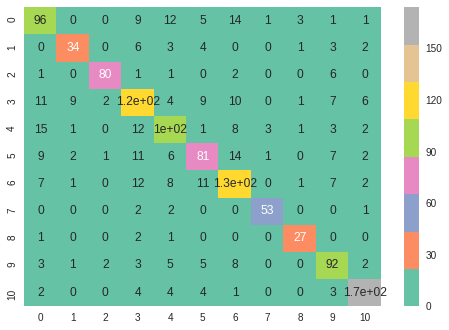

In [0]:
# evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [0]:
#TESTING DATA

# test script to preform prediction on test images inside 
# dataset/test/
#   -- image_1.jpg
#   -- image_2.jpg
#   ...

# load the trained logistic regression classifier
print ("[INFO] loading the classifier...")
classifier = pickle.load(open(classifier_path, 'rb'))

# pretrained models needed to perform feature extraction on test data too!
if model_name == "vgg16":
	base_model = VGG16(weights=weights)
	model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
	image_size = (224, 224)
else:
	base_model = None

# get all the train labels
train_labels = os.listdir(train_path)

# get all the test images paths
test_images = os.listdir(test_path)



[INFO] loading the classifier...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  import sys


In [0]:
# loop through each image in the test data
for image_path in test_images:
	path 		= test_path + "/" + image_path
	img 		= image.load_img(path, target_size=image_size)
	x 			= image.img_to_array(img)
	x 			= np.expand_dims(x, axis=0)
	x 			= preprocess_input(x)
	feature 	= model.predict(x)
	flat 		= feature.flatten()
	flat 		= np.expand_dims(flat, axis=0)
	preds 		= classifier.predict(flat)

	prediction 	= float(train_labels[preds[0]])
	
	# perform prediction on test image
	print ("I think it is a " + train_labels[preds[0]])
	img_color = cv2.imread(path, 1)
	cv2.putText(img_color, "I think it is a " + prediction, (140,445), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
	cv2.imshow("test", img_color)

	# key tracker
	key = cv2.waitKey(0) & 0xFF
	if (key == ord('q')):
		cv2.destroyAllWindows()

NameError: ignored